# Комп'ютерне моделювання задач прикладної математики

## Дифузія невзаємодіючих частинок. Рівняння Ланжевена

###  Лабораторна робота 1

***Студентка Пороскун Олена. Група ПМ.м-21***

*Task 1* 

In [1]:
#pip install matplotlib

In [2]:
from matplotlib import pyplot as plt

In [3]:
import random
import numpy as np
import math
import time

In [4]:
def ksi():
    max_num = 2147483647
    p1 = random.randint(0, max_num) / (max_num+1)
    p2 = random.randint(0, max_num) / (max_num+1)
    if (p1==0):
        p1 = 1e-10
    if (p2==0):
        p2 = 1e-10
    return math.sqrt(-2*math.log(p1)) * math.sin(2*math.pi*p2)

#ksi()

Запишемо функції для побудови графіків: для одного значення D і для двох одночасно.

In [5]:
def fun_plot1(times, delt, D = 2, t_max=11):

    plt.scatter(times, delt, label="times/delt", s=20, c='m') 
    plt.plot([0, t_max], [D*0, D*t_max], label= f'{D}'"t",linewidth = 1)

    plt.xlabel("time") 
    plt.ylabel("Delta")
    plt.title("Графік дельта в залежності від часу D=" f'{D}')
    plt.legend()
    

def fun_plot2(times,delt, times2,delt2, D1 = 2, D2 = 0.2, t_max=11):
    
    plt.scatter(times, delt, label="times/delt",s=15) 
    plt.plot([0, t_max], [D1*0, D1*t_max], label= f'{D1}'"t",linewidth = 1)

    plt.scatter(times2, delt2, label="times2/delt2",s=15) 
    plt.plot([0, t_max], [D2*0, D2*t_max], label= f'{D2}'"t",linewidth = 1)
    plt.legend()
    

In [6]:
def funct1(D):

    times = []
    delt =  []

    t = 0                  # початковий момент часу
    dt = 0.002             # крок по часу 2*(1e-3)
    t_fin = 10             # кінцевий момент часу
    t_write = 0.1          # початковий омент часу для запису
    dt_write = 0.2         # крок для запису даних
    
    N = 10000              # кількість точок(частинок)
    
    x = np.zeros(N)        # зануляємо початкові координати точок

    while(t < t_fin):
        for i in range(x.size):          # for(i = 0..N)
            x[i] += math.sqrt(D*dt)*ksi()

            if(t >= t_write):
                x_mean = 0
                x2_mean = 0
    
                for j in range(x.size):      # for(i=0..N):
                    x_mean  += x[j]
                    x2_mean += x[j]*x[j]
    
                x_mean = x_mean / N
                x2_mean = x2_mean / N
                Delta = x2_mean - x_mean*x_mean
    
                times.append(t)
                delt.append(Delta)
                # ін спосіб розрахунку станд. відхилення
                #Delta2 = np.std(x)
                #delt2.append(Delta2)
                
                #print(t, Delta)
                
                t_write += dt_write
        t += dt
        t = round(t, 3)
    
    #fun_plot1(times, delt, D)
    
    return times, delt    

In [7]:
start_time = time.time() 

D1 = 2
t1, delt1 = funct1(D1)

print("--- %s seconds ---" % (time.time() - start_time))

--- 113.26215958595276 seconds ---


In [8]:
print(len(t1))

50


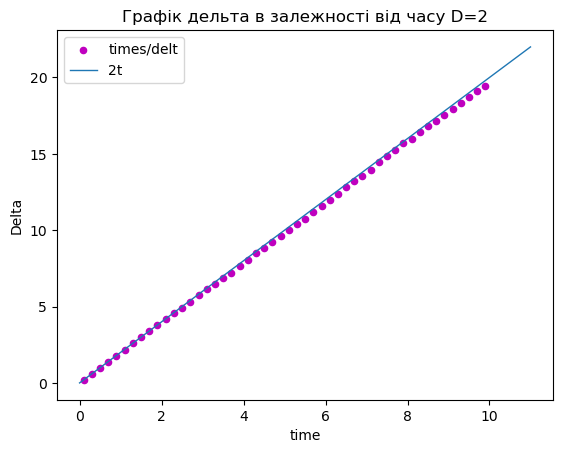

In [9]:
fun_plot1(t1, delt1, D1)

In [10]:
start_time = time.time()

D2 = 0.2
t2, delt2 = funct1(D2)

print("--- %s seconds ---" % (time.time() - start_time))

--- 113.33723187446594 seconds ---


In [11]:
print(len(t2))

50


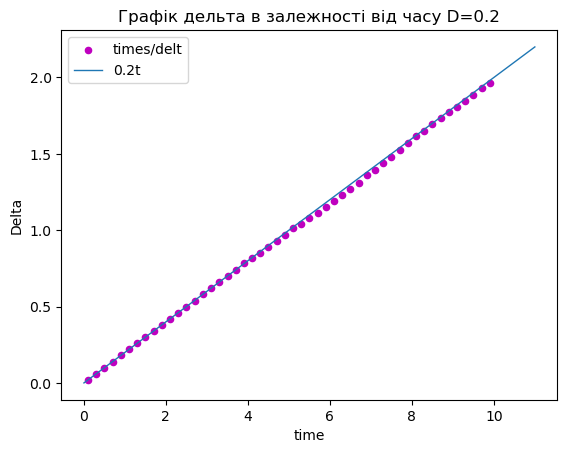

In [12]:
fun_plot1(t2, delt2, D2)

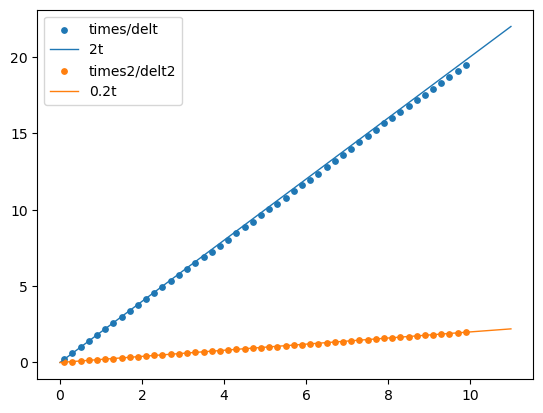

In [13]:
fun_plot2(t1, delt1, t2,delt2)

Вигляд прямих в залежності від рівняння.

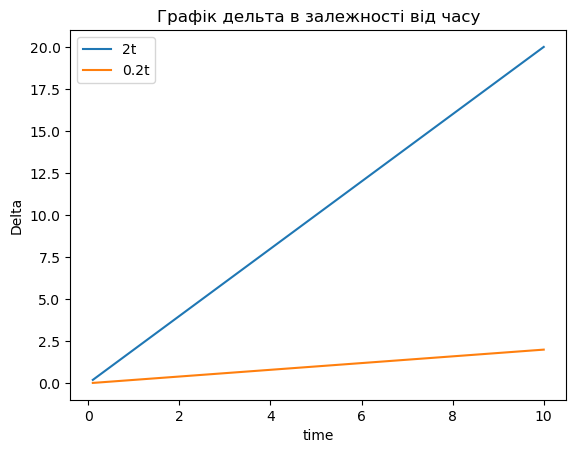

In [14]:
def plotLinesForD12(t_start=0.1, t_end=10, D1=2,D2=0.2):
    
    plt.plot([t_start, t_end], [D1*t_start, D1*t_end], label= f'{D1}'"t")
    plt.plot([t_start, t_end], [D2*t_start, D2*t_end], label= f'{D2}'"t")
    plt.xlabel("time") 
    plt.ylabel("Delta")
    plt.title("Графік дельта в залежності від часу")
    plt.legend()
    
plotLinesForD12()    

Побудуємо графік дельта в залежності від часу з логарифмованими осями.

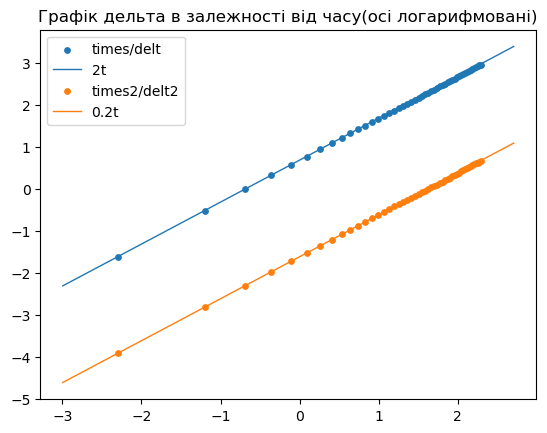

In [15]:
def fun_plot_log(times,delt, times2,delt2, D1 = 2, D2 = 0.2, t_max=15):
    
    times = np.log(times)
    delt  = np.log(delt)
    plt.scatter(times, delt, label="times/delt",s=15) # точки для розрахованих точок з D = 2
    
    x = [0.05, t_max]
    x = np.log(x)
    
    y1 = [0.05*D1, D1*t_max]
    y1 = np.log(y1)
    plt.plot(x, y1, label= f'{D1}'"t",linewidth = 1) # логарифмована пряма y=2t

    times2 = np.log(times2)
    delt2  = np.log(delt2)
    plt.scatter(times2, delt2, label="times2/delt2",s=15) # точки для розрахованих точок з D = 0.2
    
    y2 = [0.05*D2, D2*t_max]
    y2 = np.log(y2)
    plt.plot(x, y2, label= f'{D2}'"t",linewidth = 1) # логарифмована пряма y=0.2t
    
    plt.legend()
    plt.title("Графік дельта в залежності від часу(осі логарифмовані)")
    
fun_plot_log(t1, delt1, t2, delt2)  

# ------------------------------------------------------------------------------------------------------------